#Klasifikasi
# Kelompok 2

*   Repan Dhia Nararya(2202331)
*   Muhamad Tio Ariyanto(2201718)
*   Naufal Nabil Anugrah(2201090)
*   Jasmine Noor Fawzia (2200598)

# Study Case : NPL (Non Performing Loan)

# Daftar isi

berikut adalah hal-hal yang akan dilakukan di notebook ini.

1. Problem Statement

2. Penjelasan Data

  *   Import Library
  *   Membagi Dataset menjadi Data Train dan Data Test

3. Data Understanding
  *   Print Tipe Data
  *   Dimensi Dataset
  *   Target Variable
  *   Dimensi Dataset
  *   Independent Variable (Categorical)
  *   Independent Variable (Numerical)

4. Split Data

5. Model Pertama
  *   Naive Bayes
  *   Decision Tree
  *   Random Forest
  *   XGBClassifier
  *   Mencari Importan Feature

6. Missing Value Handling

7. Model Kedua
  *   Naive Bayes
  *   Decision Tree
  *   Random Forest
  *   XGBClassifier
  *   Mencari Importan Feature

8. Feature Engineering
  *   Drop Kolom
  
9. One Hot Encoding

10. Imbalance Data Handling

11. Model Keempat
  *   Naive Bayes
  *   Decision Tree
  *   Random Forest
  *   XGBClassifier
  *   Mencari Importan Feature

12. Menyimpan Hasil Model (XGBoost)

# Problem Statement

Klasifikasi untuk mendeteksi nasabah yang kreditnya akan macet (gagal bayar). Field yang menjadi kelas  yang akan diprediksi adalah  "flag_kredit_macet".

# Penjelasan Data:

1.   X: Ini adalah indeks baris.
2.   jumlah_kartu: Jumlah kartu kredit yang dimiliki oleh nasabah.
1.   outstanding: Jumlah total saldo hutang nasabah.
2.   limit_kredit: Batas maksimum kredit yang diberikan kepada nasabah.
1.   tagihan: Jumlah tagihan yang harus dibayar oleh nasabah.
2.   total_pemakaian_tunai: Total penggunaan kartu kredit untuk transaksi tunai.
1.   total_pemakaian_retail: Total penggunaan kartu kredit untuk transaksi
     retail.
2.   sisa_tagihan_tidak_terbayar: Jumlah tagihan yang belum dibayar oleh nasabah.
1.   kode_cabang: Kode cabang tempat nasabah membuka rekening.
2.   rasio_pembayaran: Rasio pembayaran tagihan oleh nasabah.
1.   persentasi_overlimit: Persentase penggunaan kredit yang melebihi limit kredit.
2.   rasio_pembayaran_3bulan: Rasio pembayaran tagihan oleh nasabah dalam 3 bulan terakhir.
1.   rasio_pembayaran_6bulan: Rasio pembayaran tagihan oleh nasabah dalam 6 bulan terakhir.
2.   skor_delikuensi: Skor yang mencerminkan sejauh mana nasabah telah melanggar ketentuan kredit.
1.   flag_kredit_macet: Variabel target yang menunjukkan apakah kredit nasabah macet atau tidak.
2.   jumlah_tahun_sejak_pembukaan_kredit: Jumlah tahun sejak nasabah pertama kali membuka kredit.
1.   total_pemakaian: Total penggunaan kartu kredit oleh nasabah.
2.   sisa_tagihan_per_jumlah_kartu: Rasio sisa tagihan dengan jumlah kartu kredit.
1.   sisa_tagihan_per_limit: Rasio sisa tagihan dengan limit kredit.
2.   total_pemakaian_per_limit: Rasio total pemakaian kredit dengan limit kredit.
1.   pemakaian_3bln_per_limit: Rasio total pemakaian kredit dalam 3 bulan terakhir dengan limit kredit.
2.   pemakaian_6bln_per_limit: Rasio total pemakaian kredit dalam 6 bulan terakhir dengan limit kredit.
1.   utilisasi_3bulan: Penggunaan kredit dalam 3 bulan terakhir.
2.   utilisasi_6bulan: Penggunaan kredit dalam 6 bulan terakhir.

# Import Library yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import calendar
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import joblib
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("/content/sample_data/dataset/npl_train.txt", sep=",", na_values='?')

In [3]:
dataset

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,...,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,...,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,...,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,...,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,...,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,...,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15488,15489,2,20743090,20000000.0,20527879.0,0.0,295000.0,14769911.0,A,0.00,...,0,1.000000,295000.0,7384956.0,0.738000,0.014700,0.058100,0.026200,1.020000,1.010000
15489,15490,2,3855317,17000000.0,3160704.0,0.0,269998.0,0.0,A,100.00,...,0,9.330000,269998.0,0.0,0.000000,0.015900,0.137000,0.073700,0.211000,0.160000
15490,15491,2,62162,6000000.0,41120.0,0.0,238.0,0.0,A,100.00,...,0,2.000000,238.0,0.0,0.000000,0.000040,0.000000,0.336000,0.010400,0.113000
15491,15492,3,264597,4000000.0,252864.0,0.0,1018.0,246512.0,I,102.00,...,0,3.830000,1018.0,82171.0,0.061600,0.000255,0.000000,0.268000,0.327000,0.647000


In [4]:
dataset_original = dataset.copy()

###Membagi dataset menjadi data train dan data test


In [5]:
train, test = train_test_split(dataset, test_size=0.2, random_state=1)

# Data Understanding

Pada bagian ini, kita akan melihat struktur dataset. Pertama, kita akan memeriksa fitur-fitur yang ada di data kita dan kemudian kita akan melihat tipe datanya.

In [6]:
train.columns

Index(['X', 'jumlah_kartu', 'outstanding', 'limit_kredit', 'tagihan',
       'total_pemakaian_tunai', 'total_pemakaian_retail',
       'sisa_tagihan_tidak_terbayar', 'kode_cabang', 'rasio_pembayaran',
       'persentasi_overlimit', 'rasio_pembayaran_3bulan',
       'rasio_pembayaran_6bulan', 'skor_delikuensi', 'flag_kredit_macet',
       'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian',
       'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit',
       'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit',
       'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan'],
      dtype='object')

Kita memiliki 23 variabel independen dan 1 variabel target, yaitu flag_kredit_macet

## Print tipe data

In [7]:
train.dtypes

X                                        int64
jumlah_kartu                             int64
outstanding                              int64
limit_kredit                           float64
tagihan                                float64
total_pemakaian_tunai                  float64
total_pemakaian_retail                 float64
sisa_tagihan_tidak_terbayar            float64
kode_cabang                             object
rasio_pembayaran                       float64
persentasi_overlimit                   float64
rasio_pembayaran_3bulan                float64
rasio_pembayaran_6bulan                float64
skor_delikuensi                          int64
flag_kredit_macet                        int64
jumlah_tahun_sejak_pembukaan_kredit    float64
total_pemakaian                        float64
sisa_tagihan_per_jumlah_kartu          float64
sisa_tagihan_per_limit                 float64
total_pemakaian_per_limit              float64
pemakaian_3bln_per_limit               float64
pemakaian_6bl

## Dimensi dataset

In [8]:
print('Dimensi dataset: ', train.shape)
train.head()

Dimensi dataset:  (12394, 24)


,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,...,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
10621,10622,2,2888699,3000000.0,2888658.0,0.0,11169.0,0.0,J,100.0,...,0,2.00,11169.0,0.0,0.0000,0.00372,0.359,0.413,0.802,0.409
5687,5688,2,3698350,23000000.0,2504373.0,0.0,1259200.0,0.0,G,100.0,...,0,8.92,1259200.0,0.0,0.0000,0.05470,0.317,0.331,0.260,0.397
10046,10047,2,4820569,5000000.0,4680828.0,0.0,18703.0,0.0,G,100.0,...,0,4.33,18703.0,0.0,0.0000,0.00374,0.521,0.226,0.724,0.212
14583,14584,3,3102139,12000000.0,952332.0,0.0,2540996.0,2866218.0,A,0.0,...,0,5.83,2540996.0,955406.0,0.2390,0.21200,0.089,0.221,0.227,0.283
5503,5504,2,166380,3000000.0,142895.0,0.0,0.0,176324.0,E,100.0,...,0,6.58,0.0,88162.0,0.0588,0.00000,0.000,0.277,0.414,0.535


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12394 entries, 10621 to 13349
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   X                                    12394 non-null  int64  
 1   jumlah_kartu                         12394 non-null  int64  
 2   outstanding                          12394 non-null  int64  
 3   limit_kredit                         12394 non-null  float64
 4   tagihan                              12394 non-null  float64
 5   total_pemakaian_tunai                12394 non-null  float64
 6   total_pemakaian_retail               12394 non-null  float64
 7   sisa_tagihan_tidak_terbayar          12394 non-null  float64
 8   kode_cabang                          12316 non-null  object 
 9   rasio_pembayaran                     12394 non-null  float64
 10  persentasi_overlimit                 12394 non-null  float64
 11  rasio_pembayaran_3bulan 

kita memiliki 15493 baris dan 24 kolom pada dataset train.

## Target Variable

target di sini adalah flag_kredit_macet.
karena bertipe kategori, maka mari kita coba lihat dengan frekuensi

In [10]:
print(train["flag_kredit_macet"].count())
train["flag_kredit_macet"].value_counts()

12394


0    11313
1     1081
Name: flag_kredit_macet, dtype: int64

Dari antara 12394 flag_kredit_macet :
- Macet : 1081
- Tidak Macet : 11313

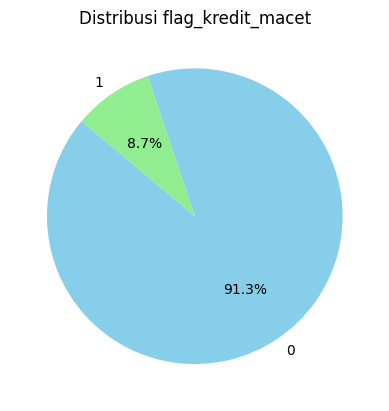

In [11]:
# Menghitung jumlah setiap nilai dalam kolom "flag_kredit_macet"
flag_kredit_macet_counts = train['flag_kredit_macet'].value_counts()

# Membuat pie chart
plt.pie(flag_kredit_macet_counts, labels=flag_kredit_macet_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribusi flag_kredit_macet')
plt.show()

Kredit 1081  (sekitar 8,7%) orang dari 12394 orang kreditnya macet.

##Independent Variable (Categorical)

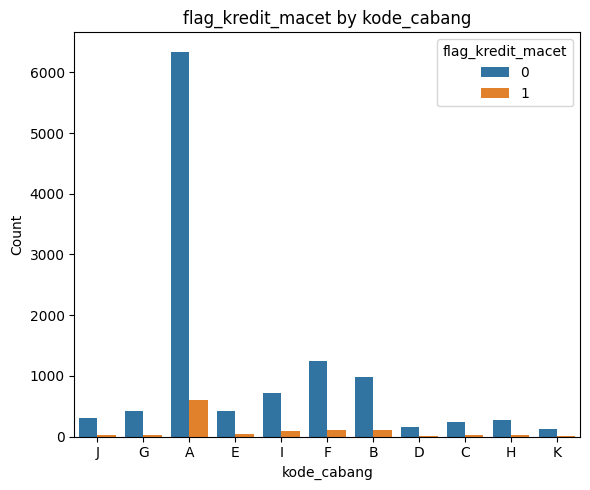

In [12]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.countplot(x='kode_cabang', data=train, hue='flag_kredit_macet', ax=ax)
ax.set_title('flag_kredit_macet by kode_cabang')
ax.set_xlabel('kode_cabang')
ax.set_ylabel('Count')
ax.legend(title='flag_kredit_macet')

plt.tight_layout()
plt.show()


##Independent Variable(Numerical)

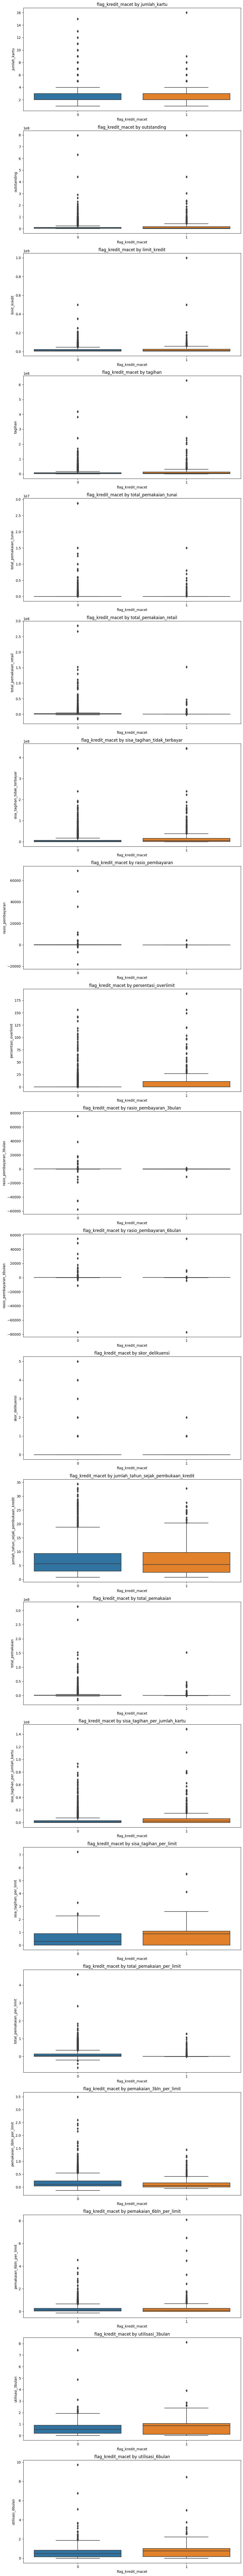

In [13]:
numeric_columns = ['jumlah_kartu', 'outstanding', 'limit_kredit', 'tagihan', 'total_pemakaian_tunai',
                   'total_pemakaian_retail', 'sisa_tagihan_tidak_terbayar', 'rasio_pembayaran',
                   'persentasi_overlimit', 'rasio_pembayaran_3bulan', 'rasio_pembayaran_6bulan',
                   'skor_delikuensi', 'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian',
                   'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit', 'total_pemakaian_per_limit',
                   'pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan']

fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, len(numeric_columns)*5))

for idx, num_col in enumerate(numeric_columns):
    sns.boxplot(y=num_col, data=train, x='flag_kredit_macet', ax=axes[idx])
    axes[idx].set_title(f'flag_kredit_macet by {num_col}')
    axes[idx].set_xlabel('flag_kredit_macet')
    axes[idx].set_ylabel(num_col)

plt.tight_layout()
plt.show()


<Axes: >

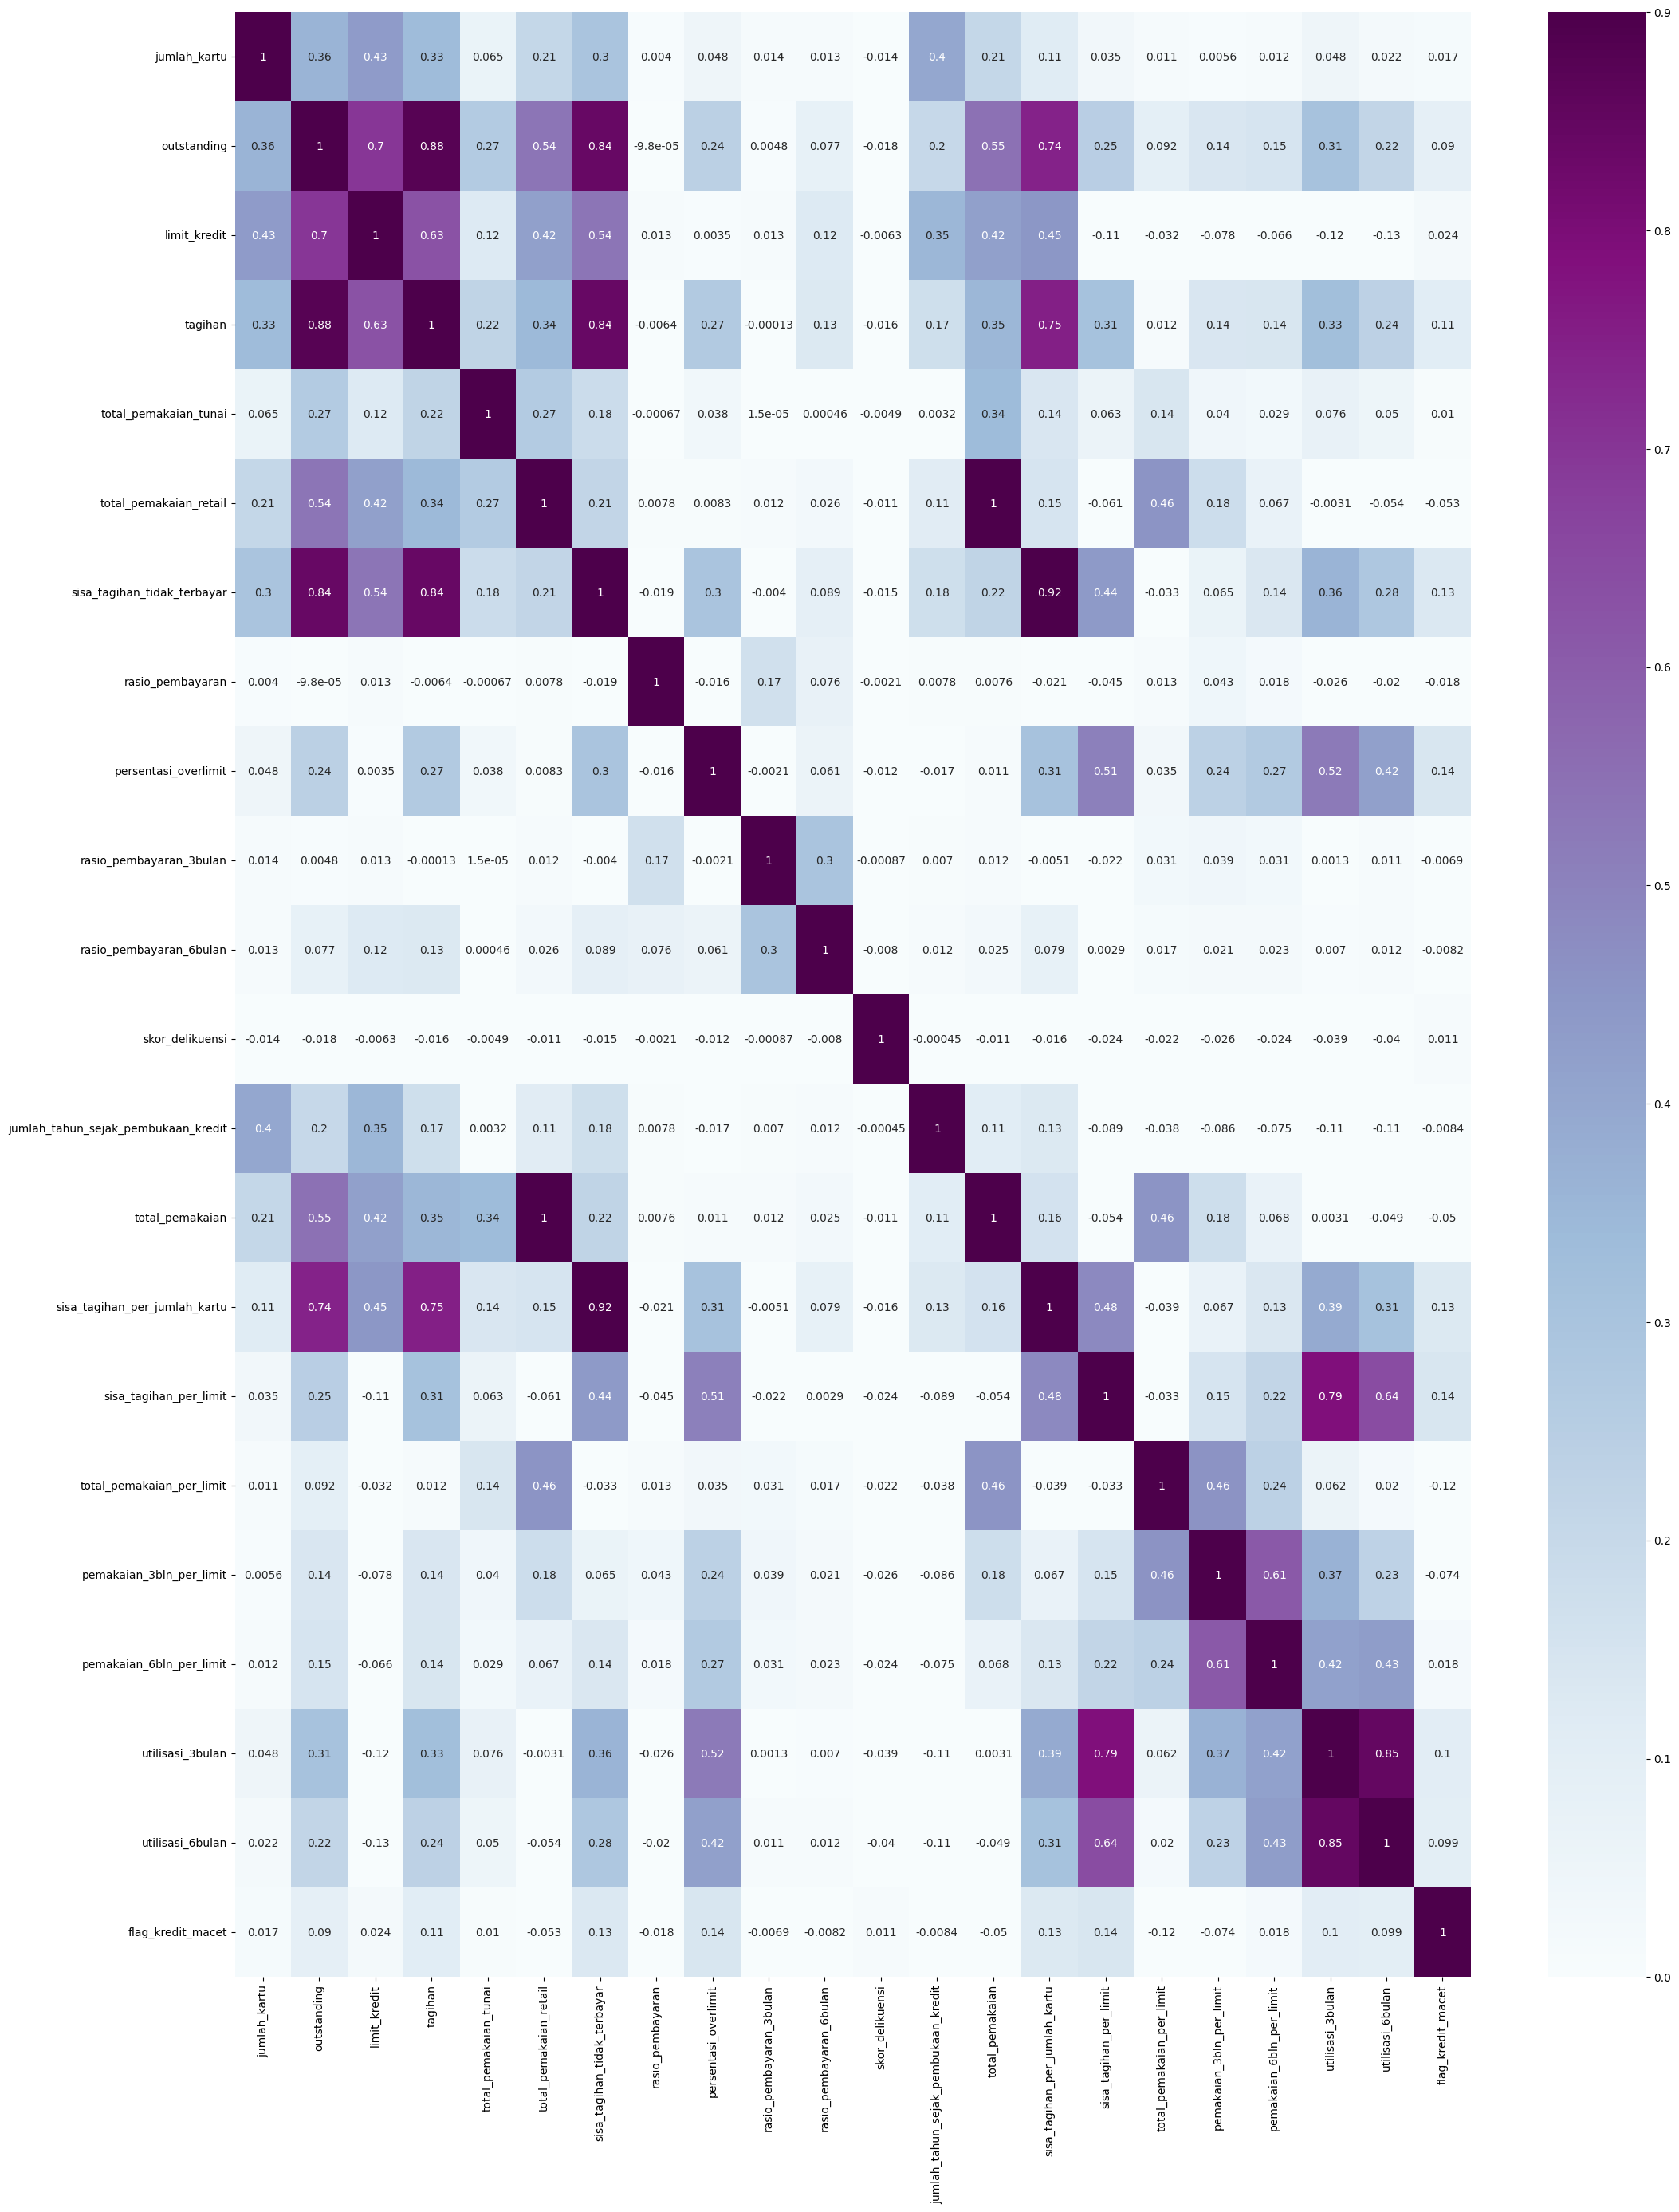

In [14]:
df = train[['kode_cabang','jumlah_kartu', 'outstanding', 'limit_kredit', 'tagihan', 'total_pemakaian_tunai',
                   'total_pemakaian_retail', 'sisa_tagihan_tidak_terbayar', 'rasio_pembayaran',
                   'persentasi_overlimit', 'rasio_pembayaran_3bulan', 'rasio_pembayaran_6bulan',
                   'skor_delikuensi', 'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian',
                   'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit', 'total_pemakaian_per_limit',
                   'pemakaian_3bln_per_limit', 'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan','flag_kredit_macet']]
plt.figure(figsize=(25, 32))
sns.heatmap(df.corr(), annot=True, vmin=0, vmax=.9, cmap='BuPu')

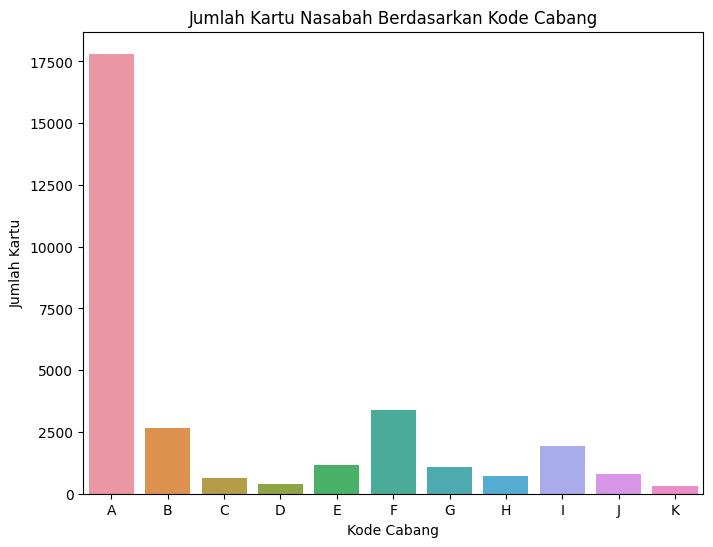

In [15]:
# Menghitung jumlah kartu nasabah per kode cabang
jumlah_kartu_per_cabang = train.groupby('kode_cabang')['jumlah_kartu'].sum().reset_index()

# Membuat barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='kode_cabang', y='jumlah_kartu', data=jumlah_kartu_per_cabang)
plt.xlabel('Kode Cabang')
plt.ylabel('Jumlah Kartu')
plt.title('Jumlah Kartu Nasabah Berdasarkan Kode Cabang')
plt.show()

#Split Data

In [16]:
# Menentukan Kelas Target
le = preprocessing.LabelEncoder()
le.fit(train.flag_kredit_macet)

y = le.transform(train.flag_kredit_macet)
X = train.drop("flag_kredit_macet",axis=1)

In [17]:
# panggil fungsi train_test_split
# isi dengan parameter X, Y, nilai test_size 0.2, dan random state 1

x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=1)

#Model Pertama
Disini kita mencoba melihat akurasi dari model berdasarkan data mentah dan one-hot encoding pada kolom kode_cabang.

In [18]:
x_train = pd.get_dummies(x_train)
x_cv = pd.get_dummies(x_cv)

##Naive Bayes

In [19]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train) #latih nb_model dengan metode fit() menggunakan data train
Y_pred = nb_model.predict(x_cv) #gunakan model untuk membuat prediksi menggunakan data X validasi
acc = accuracy_score(y_cv, Y_pred) * 100  #buat skor akurasi dengan membandingkan hasil prediksi dengan data y validasi

print("Akurasi {}".format(acc))
print(classification_report(y_cv, Y_pred))


Akurasi 86.97055264219443
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2247
           1       0.21      0.14      0.17       232

    accuracy                           0.87      2479
   macro avg       0.56      0.54      0.55      2479
weighted avg       0.85      0.87      0.86      2479



##Decision Tree

In [20]:
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(x_train,y_train)
pred_cv_tree=tree_model.predict(x_cv)
score_tree =accuracy_score(pred_cv_tree,y_cv)*100
print("akurasi:",score_tree)
print(classification_report(y_cv, pred_cv_tree))

akurasi: 86.76885841064946
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2247
           1       0.30      0.32      0.31       232

    accuracy                           0.87      2479
   macro avg       0.62      0.62      0.62      2479
weighted avg       0.87      0.87      0.87      2479



##Random Forest

In [21]:
forest_model = RandomForestClassifier(random_state=1,max_depth=13,n_estimators=50)
forest_model.fit(x_train,y_train)
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
print("akurasi:",score_forest)
print(classification_report(y_cv, pred_cv_forest))

akurasi: 90.883420734167
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2247
           1       0.58      0.09      0.16       232

    accuracy                           0.91      2479
   macro avg       0.75      0.54      0.56      2479
weighted avg       0.88      0.91      0.88      2479



##XGBoost

In [22]:
xgb_model = XGBClassifier(n_estimators=50,max_depth=8, gamma=0.1)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100

# Mencetak hasil dari XGBoost
print("Akurasi : ", score_xgb)
print(classification_report(y_cv, pred_xgb))

Akurasi :  90.27833803953207
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2247
           1       0.45      0.16      0.23       232

    accuracy                           0.90      2479
   macro avg       0.68      0.57      0.59      2479
weighted avg       0.87      0.90      0.88      2479





## Mencari Important Feature



In [23]:

# Untuk mengethaui atribut yang berperan dalam melakukan prediksi
feature_importances = pd.DataFrame(xgb_model.feature_importances_,index =
                        x_train.columns, columns = ['importance']).sort_values('importance',ascending=False)

print(feature_importances)

                                     importance
rasio_pembayaran                       0.125705
total_pemakaian                        0.064155
total_pemakaian_per_limit              0.056189
total_pemakaian_retail                 0.045029
sisa_tagihan_tidak_terbayar            0.038441
persentasi_overlimit                   0.037803
outstanding                            0.036578
kode_cabang_B                          0.033862
rasio_pembayaran_3bulan                0.032225
total_pemakaian_tunai                  0.031624
pemakaian_3bln_per_limit               0.029332
utilisasi_3bulan                       0.029115
sisa_tagihan_per_jumlah_kartu          0.028341
kode_cabang_A                          0.028037
rasio_pembayaran_6bulan                0.027404
jumlah_kartu                           0.027187
sisa_tagihan_per_limit                 0.025360
kode_cabang_I                          0.025339
jumlah_tahun_sejak_pembukaan_kredit    0.024835
tagihan                                0

<Axes: >

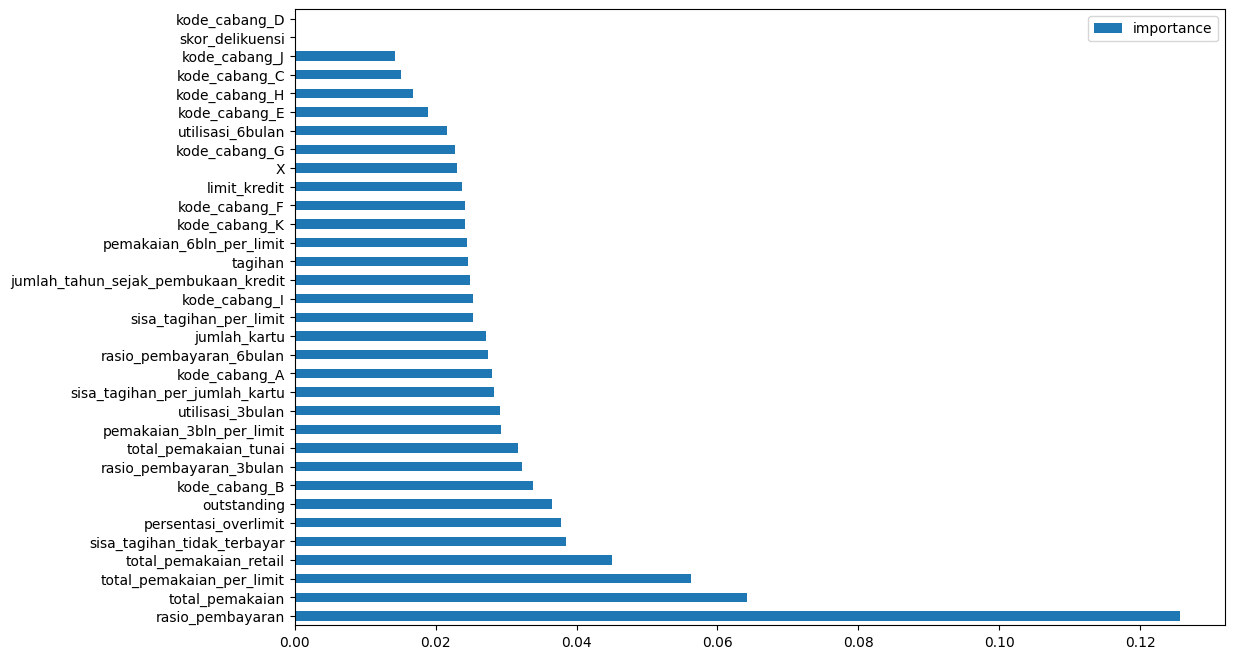

In [24]:
feature_importances.plot(kind='barh', figsize=(12, 8))

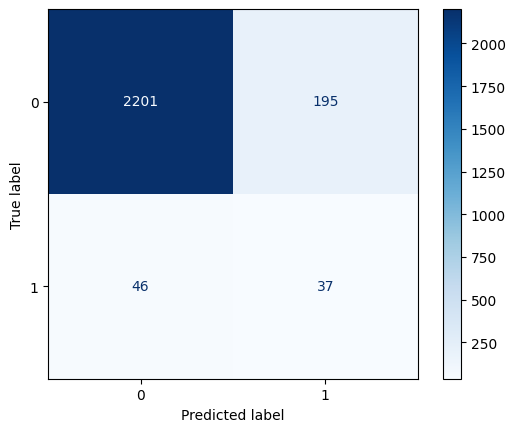

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(pred_xgb,y_cv)


# Menampilkan matriks kebingungan menggunakan ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [26]:
df_acc = pd.DataFrame({'Naive_Bayes': [acc], 'Decission_Tree': [score_tree],
                       'Random_Forest': [score_forest], 'XGBoost': [score_xgb]})
df_acc

,Naive_Bayes,Decission_Tree,Random_Forest,XGBoost
0,86.970553,86.768858,90.883421,90.278338


In [27]:
# Untuk mengethaui atribut yang berperan dalam melakukan prediksi
feature_importances = pd.DataFrame(xgb_model.feature_importances_,index =
                        x_train.columns, columns = ['importance']).sort_values('importance',ascending=False)

print(feature_importances)


                                     importance
rasio_pembayaran                       0.125705
total_pemakaian                        0.064155
total_pemakaian_per_limit              0.056189
total_pemakaian_retail                 0.045029
sisa_tagihan_tidak_terbayar            0.038441
persentasi_overlimit                   0.037803
outstanding                            0.036578
kode_cabang_B                          0.033862
rasio_pembayaran_3bulan                0.032225
total_pemakaian_tunai                  0.031624
pemakaian_3bln_per_limit               0.029332
utilisasi_3bulan                       0.029115
sisa_tagihan_per_jumlah_kartu          0.028341
kode_cabang_A                          0.028037
rasio_pembayaran_6bulan                0.027404
jumlah_kartu                           0.027187
sisa_tagihan_per_limit                 0.025360
kode_cabang_I                          0.025339
jumlah_tahun_sejak_pembukaan_kredit    0.024835
tagihan                                0

Dapat dilihat bahwa 'rasio_pembayaran' merupakan atribut yang paling signifikan dalam model prediksi, dengan skor tertinggi sebesar 0.125705. Atribut lain seperti 'total_pemakaian' dan 'total_pemakaian_per_limit' juga memiliki skor yang cukup tinggi. Namun, beberapa atribut, seperti 'skor_delikuensi' dan 'kode_cabang_D,' memiliki skor nol, menunjukkan bahwa mereka mungkin tidak memberikan kontribusi signifikan dalam prediksi

# Penanganan Missing Value

Setelah mengeksplorasi semua variabel dalam data kita, kita sekarang dapat memperhitungkan nilai yang hilang karena data yang hilang dapat berdampak buruk pada kinerja model.

## Missing value imputation

In [28]:
train.isnull().sum()

X                                       0
jumlah_kartu                            0
outstanding                             0
limit_kredit                            0
tagihan                                 0
total_pemakaian_tunai                   0
total_pemakaian_retail                  0
sisa_tagihan_tidak_terbayar             0
kode_cabang                            78
rasio_pembayaran                        0
persentasi_overlimit                    0
rasio_pembayaran_3bulan                 0
rasio_pembayaran_6bulan                 0
skor_delikuensi                         0
flag_kredit_macet                       0
jumlah_tahun_sejak_pembukaan_kredit     0
total_pemakaian                         0
sisa_tagihan_per_jumlah_kartu           0
sisa_tagihan_per_limit                  0
total_pemakaian_per_limit               0
pemakaian_3bln_per_limit                0
pemakaian_6bln_per_limit                0
utilisasi_3bulan                        0
utilisasi_6bulan                  

In [29]:
test.isnull().sum()

X                                       0
jumlah_kartu                            0
outstanding                             0
limit_kredit                            0
tagihan                                 0
total_pemakaian_tunai                   0
total_pemakaian_retail                  0
sisa_tagihan_tidak_terbayar             0
kode_cabang                            22
rasio_pembayaran                        0
persentasi_overlimit                    0
rasio_pembayaran_3bulan                 0
rasio_pembayaran_6bulan                 0
skor_delikuensi                         0
flag_kredit_macet                       0
jumlah_tahun_sejak_pembukaan_kredit     0
total_pemakaian                         0
sisa_tagihan_per_jumlah_kartu           0
sisa_tagihan_per_limit                  0
total_pemakaian_per_limit               0
pemakaian_3bln_per_limit                0
pemakaian_6bln_per_limit                0
utilisasi_3bulan                        0
utilisasi_6bulan                  

kita akan menangani nilai yang hilang di semua fitur satu per satu.

Kita dapat mempertimbangkan metode-metode ini untuk mengisi nilai yang hilang:

- variabel numerik: imputasi menggunakan mean atau median
- variabel kategorikal: imputasi menggunakan modus

In [30]:
train["kode_cabang"].fillna(train["kode_cabang"].mode()[0],inplace=True)

In [31]:
test["kode_cabang"].fillna(test["kode_cabang"].mode()[0],inplace=True)

#Model Kedua
Disini kita mencoba melihat akurasi model jika data null telah diisi dan melakukan one-hot encoding.

In [32]:
# panggil fungsi train_test_split
# isi dengan parameter X, y, nilai test_size 0.2, dan random state 1

x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=1)

In [33]:
x_train = pd.get_dummies(x_train)
x_cv = pd.get_dummies(x_cv)

## Naive Bayes

In [34]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train) #latih nb_model dengan metode fit() menggunakan data train
Y_pred = nb_model.predict(x_cv) #gunakan model untuk membuat prediksi menggunakan data X validasi
acc = accuracy_score(y_cv, Y_pred) * 100  #buat skor akurasi dengan membandingkan hasil prediksi dengan data y validasi

print("Akurasi {}".format(acc))
print(classification_report(y_cv, Y_pred))


Akurasi 86.97055264219443
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2247
           1       0.21      0.14      0.17       232

    accuracy                           0.87      2479
   macro avg       0.56      0.54      0.55      2479
weighted avg       0.85      0.87      0.86      2479



## Decision Tree

In [35]:
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(x_train,y_train)
pred_cv_tree=tree_model.predict(x_cv)
score_tree =accuracy_score(pred_cv_tree,y_cv)*100
print("akurasi:",score_tree)
print(classification_report(y_cv, pred_cv_tree))

akurasi: 86.76885841064946
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2247
           1       0.30      0.32      0.31       232

    accuracy                           0.87      2479
   macro avg       0.62      0.62      0.62      2479
weighted avg       0.87      0.87      0.87      2479



##Random Forest

In [36]:
forest_model = RandomForestClassifier(random_state=1,max_depth=13,n_estimators=50)
forest_model.fit(x_train,y_train)
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
print("akurasi:",score_forest)
print(classification_report(y_cv, pred_cv_forest))

akurasi: 90.883420734167
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2247
           1       0.58      0.09      0.16       232

    accuracy                           0.91      2479
   macro avg       0.75      0.54      0.56      2479
weighted avg       0.88      0.91      0.88      2479



## XGBoost

In [37]:
xgb_model = XGBClassifier(n_estimators=100,max_depth=9, gamma=0.3)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100

# Mencetak hasil dari XGBoost
print("Akurasi : ", score_xgb)
print(classification_report(y_cv, pred_xgb))

Akurasi :  90.19766034691408
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2247
           1       0.45      0.19      0.27       232

    accuracy                           0.90      2479
   macro avg       0.68      0.58      0.61      2479
weighted avg       0.88      0.90      0.88      2479



In [38]:
df_acc = pd.DataFrame({'Naive_Bayes': [acc], 'Decission_Tree': [score_tree],
                       'Random_Forest': [score_forest], 'XGBoost': [score_xgb]})
df_acc

,Naive_Bayes,Decission_Tree,Random_Forest,XGBoost
0,86.970553,86.768858,90.883421,90.19766




## Mencari Important Feature



In [39]:

# Untuk mengethaui atribut yang berperan dalam melakukan prediksi
feature_importances = pd.DataFrame(xgb_model.feature_importances_,index =
                        x_train.columns, columns = ['importance']).sort_values('importance',ascending=False)

print(feature_importances)

                                     importance
rasio_pembayaran                       0.147505
total_pemakaian                        0.061349
total_pemakaian_per_limit              0.058077
total_pemakaian_retail                 0.052589
sisa_tagihan_tidak_terbayar            0.040980
outstanding                            0.036714
persentasi_overlimit                   0.036666
rasio_pembayaran_3bulan                0.032729
sisa_tagihan_per_jumlah_kartu          0.031349
rasio_pembayaran_6bulan                0.029165
utilisasi_3bulan                       0.029078
pemakaian_3bln_per_limit               0.028058
kode_cabang_B                          0.026183
kode_cabang_C                          0.025933
pemakaian_6bln_per_limit               0.025766
jumlah_kartu                           0.025401
sisa_tagihan_per_limit                 0.025378
jumlah_tahun_sejak_pembukaan_kredit    0.025126
total_pemakaian_tunai                  0.024985
kode_cabang_A                          0

<Axes: >

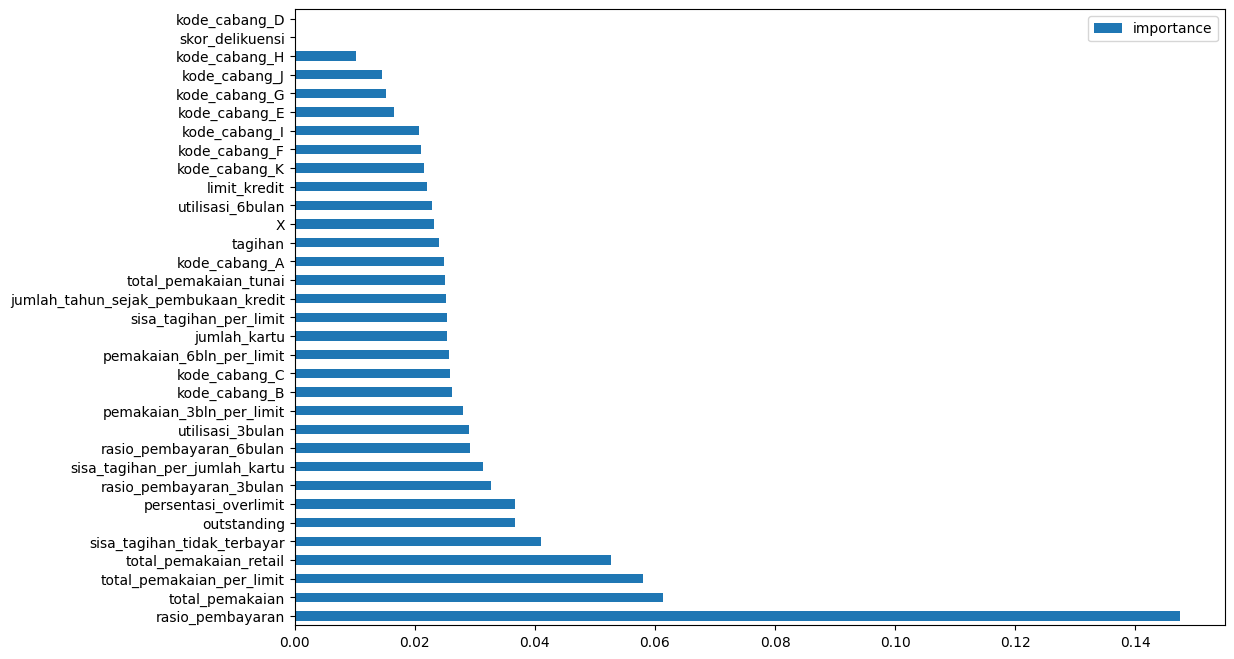

In [40]:
feature_importances.plot(kind='barh', figsize=(12, 8))

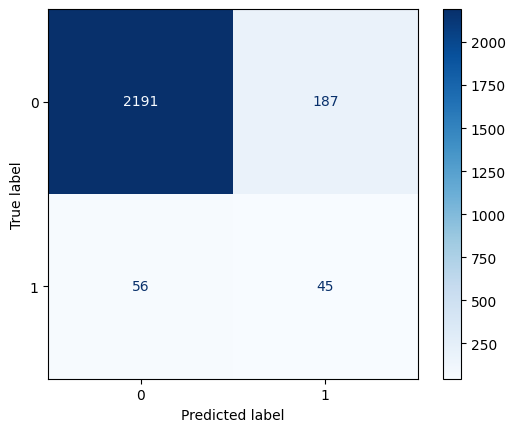

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(pred_xgb,y_cv)


# Menampilkan matriks kebingungan menggunakan ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#Feature Engineering

Sekarang mari kita hilangkan variabel-variabel yang kita gunakan untuk membuat fitur-fitur baru ini.

Alasan untuk melakukan hal ini adalah, korelasi antara fitur-fitur lama dan fitur-fitur baru ini akan sangat tinggi dan beberapa model mengasumsikan bahwa variabel-variabel tersebut tidak berkorelasi tinggi.

Kita juga akan menghilangkan noise dari dataset, jadi menghapus fitur-fitur yang berkorelasi akan membantu mengurangi noise juga.

selain itu menghapus korelasi yang tinggi dapat meningkatkan kinerja model dan mengurangi resiko overfitting

In [42]:
train["tagihan"].value_counts()

11000000.0    19
10000000.0    16
12000000.0    16
3000000.0     14
13000000.0    13
              ..
11644338.0     1
1507105.0      1
254083.0       1
3357484.0      1
607700.0       1
Name: tagihan, Length: 8674, dtype: int64

In [43]:
train["limit_kredit"].value_counts()

3000000.0      1758
5000000.0      1693
7000000.0       880
10000000.0      759
20000000.0      743
               ... 
105000000.0       1
3500000.0         1
195000000.0       1
133000000.0       1
205000000.0       1
Name: limit_kredit, Length: 147, dtype: int64

In [44]:

train['rasio_tagihan_limit'] = train['tagihan'] / train['limit_kredit']


In [45]:
train.drop(["tagihan", "limit_kredit"], axis=1)

,X,jumlah_kartu,outstanding,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,...,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,rasio_tagihan_limit
10621,10622,2,2888699,0.0,11169.0,0.0,J,100.0,0.0,100.00,...,2.000000,11169.0,0.0,0.000000,0.003720,0.359000,0.413000,0.802000,0.409000,0.962886
5687,5688,2,3698350,0.0,1259200.0,0.0,G,100.0,0.0,100.00,...,8.920000,1259200.0,0.0,0.000000,0.054700,0.317000,0.331000,0.260000,0.397000,0.108886
10046,10047,2,4820569,0.0,18703.0,0.0,G,100.0,0.0,59.00,...,4.330000,18703.0,0.0,0.000000,0.003740,0.521000,0.226000,0.724000,0.212000,0.936166
14583,14584,3,3102139,0.0,2540996.0,2866218.0,A,0.0,0.0,75.00,...,5.830000,2540996.0,955406.0,0.239000,0.212000,0.089000,0.221000,0.227000,0.283000,0.079361
5503,5504,2,166380,0.0,0.0,176324.0,E,100.0,0.0,28.80,...,6.580000,0.0,88162.0,0.058800,0.000000,0.000000,0.277000,0.414000,0.535000,0.047632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,906,2,2214957,600000.0,343001.0,0.0,A,100.0,0.0,112.57,...,4.000000,943001.0,0.0,0.000000,0.047150,0.114919,0.151145,0.181637,0.277853,0.106869
5192,5193,2,2932715,0.0,1591820.0,2703852.0,F,0.0,0.0,23.70,...,9.500000,1591820.0,1351926.0,0.300000,0.177000,0.057800,0.053100,0.237000,0.338000,0.122542
12172,12173,2,1334327,0.0,665077.0,1220336.0,G,101.0,0.0,100.00,...,5.330000,665077.0,610168.0,0.244000,0.133000,0.608000,0.583000,0.631000,0.408000,0.121540
235,236,2,6794870,0.0,320000.0,6899502.0,I,0.0,0.0,10.13,...,10.083333,320000.0,3449751.0,0.985643,0.045714,0.039428,0.127672,0.998596,1.163188,1.012624


## Drop Kolom


drop variabel "X" karena variabel ini tidak memiliki pengaruh apapun terhadap status pinjaman. Kita akan melakukan perubahan yang sama pada dataset uji yang telah kita lakukan pada dataset pelatihan.

In [46]:
# hapus X pada dataframe train & test
train = train.drop(["X"], axis = 1)
test = test.drop(["X"], axis = 1)

In [47]:
train.head(3)

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,...,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,rasio_tagihan_limit
10621,2,2888699,3000000.0,2888658.0,0.0,11169.0,0.0,J,100.0,0.0,...,2.00,11169.0,0.0,0.0,0.00372,0.359,0.413,0.802,0.409,0.962886
5687,2,3698350,23000000.0,2504373.0,0.0,1259200.0,0.0,G,100.0,0.0,...,8.92,1259200.0,0.0,0.0,0.05470,0.317,0.331,0.260,0.397,0.108886
10046,2,4820569,5000000.0,4680828.0,0.0,18703.0,0.0,G,100.0,0.0,...,4.33,18703.0,0.0,0.0,0.00374,0.521,0.226,0.724,0.212,0.936166


In [48]:
test.head(3)

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,...,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
3576,2,8096704,8000000.0,4073734.0,0.0,1901025.0,5213854.0,A,65.5,1.24,...,0,2.75,1901025.0,2606927.0,0.652,0.2380,0.1920,0.0436,0.972,0.628
8564,2,684568,8000000.0,47263.0,0.0,538655.0,0.0,J,100.0,0.00,...,0,3.67,538655.0,0.0,0.000,0.0673,0.0275,0.1350,0.117,0.158
13670,3,3617686,11000000.0,1933276.0,0.0,586000.0,3155317.0,A,100.0,0.00,...,0,5.75,586000.0,1051772.0,0.287,0.0533,0.1280,0.0864,0.359,0.267


Kita akan menggunakan scikit-learn (sklearn) untuk membuat model yang berbeda. Ini adalah salah satu alat yang paling efisien yang berisi banyak fungsi bawaan yang dapat digunakan untuk pemodelan di Python.

Sklearn membutuhkan variabel target dalam dataset terpisah. Jadi, kita akan menghapus variabel target dari dataset train dan menyimpannya di dataset lain.

buat variabel feature dengan droping variable target "flag_kredit_macet"

In [49]:
# isi X dengan variabel fiture
X= train.drop('flag_kredit_macet',1)

In [50]:
X.head(2)

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,...,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan,rasio_tagihan_limit
10621,2,2888699,3000000.0,2888658.0,0.0,11169.0,0.0,J,100.0,0.0,...,2.00,11169.0,0.0,0.0,0.00372,0.359,0.413,0.802,0.409,0.962886
5687,2,3698350,23000000.0,2504373.0,0.0,1259200.0,0.0,G,100.0,0.0,...,8.92,1259200.0,0.0,0.0,0.05470,0.317,0.331,0.260,0.397,0.108886


In [51]:
# isi y dengan variabel target
y= train[['flag_kredit_macet']]

In [52]:
y.head(2)

,flag_kredit_macet
10621,0
5687,0


## One hot encoding
Sekarang kita akan membuat variabel dummy untuk variabel kategorikal. Variabel dummy mengubah variabel kategorikal menjadi serangkaian angka 0 dan 1, sehingga lebih mudah untuk diukur dan dibandingkan.

In [53]:
X = pd.get_dummies(X)
# lakukan hal yang sama pada train dan test
train=pd.get_dummies(train)


In [54]:
X.head(3)

,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,...,kode_cabang_B,kode_cabang_C,kode_cabang_D,kode_cabang_E,kode_cabang_F,kode_cabang_G,kode_cabang_H,kode_cabang_I,kode_cabang_J,kode_cabang_K
10621,2,2888699,3000000.0,2888658.0,0.0,11169.0,0.0,100.0,0.0,100.0,...,0,0,0,0,0,0,0,0,1,0
5687,2,3698350,23000000.0,2504373.0,0.0,1259200.0,0.0,100.0,0.0,100.0,...,0,0,0,0,0,1,0,0,0,0
10046,2,4820569,5000000.0,4680828.0,0.0,18703.0,0.0,100.0,0.0,59.0,...,0,0,0,0,0,1,0,0,0,0


In [55]:
test.shape

(3099, 23)

## Mencari Important Feature

In [56]:

# Untuk mengethaui atribut yang berperan dalam melakukan prediksi
feature_importances = pd.DataFrame(xgb_model.feature_importances_,index =
                        x_train.columns, columns = ['importance']).sort_values('importance',ascending=False)

print(feature_importances)

                                     importance
rasio_pembayaran                       0.147505
total_pemakaian                        0.061349
total_pemakaian_per_limit              0.058077
total_pemakaian_retail                 0.052589
sisa_tagihan_tidak_terbayar            0.040980
outstanding                            0.036714
persentasi_overlimit                   0.036666
rasio_pembayaran_3bulan                0.032729
sisa_tagihan_per_jumlah_kartu          0.031349
rasio_pembayaran_6bulan                0.029165
utilisasi_3bulan                       0.029078
pemakaian_3bln_per_limit               0.028058
kode_cabang_B                          0.026183
kode_cabang_C                          0.025933
pemakaian_6bln_per_limit               0.025766
jumlah_kartu                           0.025401
sisa_tagihan_per_limit                 0.025378
jumlah_tahun_sejak_pembukaan_kredit    0.025126
total_pemakaian_tunai                  0.024985
kode_cabang_A                          0

# Penanganan data Imbalance
terdapat ketimpangan antara data dengan target 1 dan 0 pada flag_kredit_macet. kita akan menggunakan metode Resampling untuk menaikan jumlah data minoritas. menggunakan Smote

In [57]:
print(y.shape)
print(X.shape)

(12394, 1)
(12394, 33)


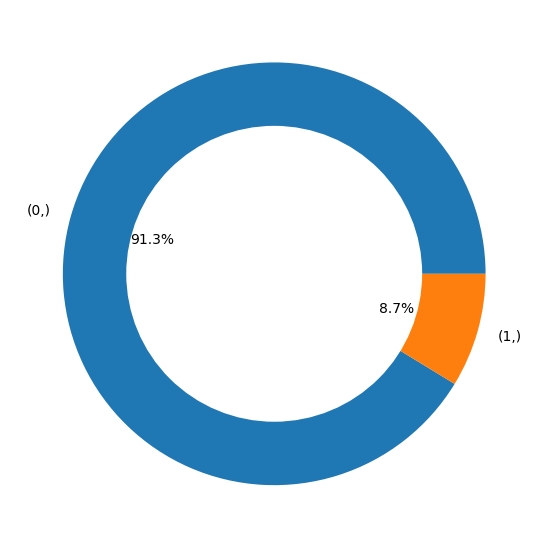

In [58]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

In [59]:
from imblearn.over_sampling import SMOTE
over=SMOTE()
X,y=over.fit_resample(X, y)

In [60]:
print(y.shape)
print(X.shape)

(22626, 1)
(22626, 33)


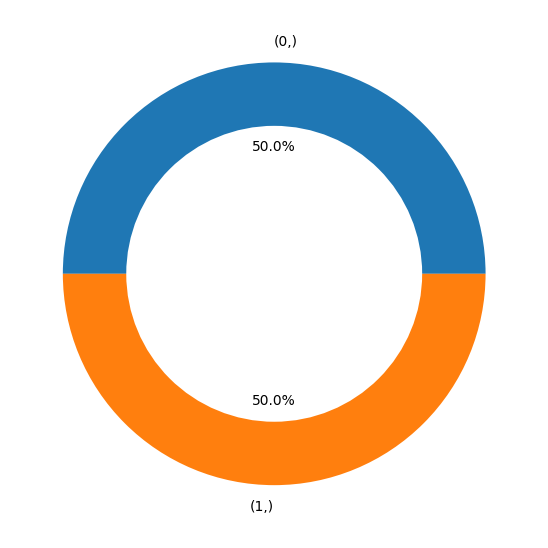

In [61]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)

In [62]:
size_counts = y['flag_kredit_macet'].value_counts()

#print
size_counts

0    11313
1    11313
Name: flag_kredit_macet, dtype: int64

#Model Ketiga
Disini kita melihat akurasi model jika telah dilakukan one-hot encoding, mengisi data null, dan mengatasi data imbalance

In [63]:
# panggil fungsi train_test_split
# isi dengan parameter X, y, nilai test_size 0.2, dan random state 1

x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=1)

## Naive Bayes

In [64]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train) #latih nb_model dengan metode fit() menggunakan data train
Y_pred = nb_model.predict(x_cv) #gunakan model untuk membuat prediksi menggunakan data X validasi
acc = accuracy_score(y_cv, Y_pred) * 100  #buat skor akurasi dengan membandingkan hasil prediksi dengan data y validasi

print("Akurasi {}".format(acc))
print(classification_report(y_cv, Y_pred))


Akurasi 57.180733539549266
              precision    recall  f1-score   support

           0       0.55      0.85      0.66      2255
           1       0.66      0.30      0.41      2271

    accuracy                           0.57      4526
   macro avg       0.60      0.57      0.54      4526
weighted avg       0.60      0.57      0.54      4526



## Decision Tree

In [65]:
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(x_train,y_train)
pred_cv_tree=tree_model.predict(x_cv)
score_tree =accuracy_score(pred_cv_tree,y_cv)*100
print("akurasi:",score_tree)
print(classification_report(y_cv, pred_cv_tree))

akurasi: 88.28988068935043
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2255
           1       0.87      0.90      0.89      2271

    accuracy                           0.88      4526
   macro avg       0.88      0.88      0.88      4526
weighted avg       0.88      0.88      0.88      4526



##Random Forest

In [66]:
forest_model = RandomForestClassifier(random_state=1,max_depth=13,n_estimators=50)
forest_model.fit(x_train,y_train)
pred_cv_forest=forest_model.predict(x_cv)
score_forest = accuracy_score(pred_cv_forest,y_cv)*100
print("akurasi:",score_forest)
print(classification_report(y_cv, pred_cv_forest))

akurasi: 91.40521431727795
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2255
           1       0.89      0.95      0.92      2271

    accuracy                           0.91      4526
   macro avg       0.92      0.91      0.91      4526
weighted avg       0.92      0.91      0.91      4526



## XGBoost

In [67]:
xgb_model = XGBClassifier(n_estimators=100,max_depth=9, gamma=0.1)
xgb_model.fit(x_train,y_train)
pred_xgb=xgb_model.predict(x_cv)
score_xgb = accuracy_score(pred_xgb,y_cv)*100

# Mencetak hasil dari XGBoost
print("Akurasi : ", score_xgb)
print(classification_report(y_cv, pred_xgb))

Akurasi :  94.60892620415378
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2255
           1       0.95      0.95      0.95      2271

    accuracy                           0.95      4526
   macro avg       0.95      0.95      0.95      4526
weighted avg       0.95      0.95      0.95      4526



In [68]:
df_acc = pd.DataFrame({'Naive_Bayes': [acc], 'Decission_Tree': [score_tree],
                       'Random_Forest': [score_forest], 'XGBoost': [score_xgb]})
df_acc

,Naive_Bayes,Decission_Tree,Random_Forest,XGBoost
0,57.180734,88.289881,91.405214,94.608926




## Mencari Important Feature



In [69]:

# Untuk mengethaui atribut yang berperan dalam melakukan prediksi
feature_importances = pd.DataFrame(xgb_model.feature_importances_,index =
                        x_train.columns, columns = ['importance']).sort_values('importance',ascending=False)

print(feature_importances)

                                     importance
kode_cabang_I                          0.093828
kode_cabang_B                          0.087672
kode_cabang_E                          0.081685
kode_cabang_H                          0.074567
kode_cabang_J                          0.074297
rasio_pembayaran                       0.070133
kode_cabang_G                          0.065998
kode_cabang_F                          0.064918
kode_cabang_C                          0.063597
total_pemakaian_retail                 0.037639
kode_cabang_D                          0.034233
total_pemakaian_per_limit              0.033412
kode_cabang_A                          0.031161
kode_cabang_K                          0.025019
persentasi_overlimit                   0.024157
outstanding                            0.011959
sisa_tagihan_tidak_terbayar            0.011838
rasio_pembayaran_3bulan                0.011698
total_pemakaian_tunai                  0.010948
sisa_tagihan_per_limit                 0

<Axes: >

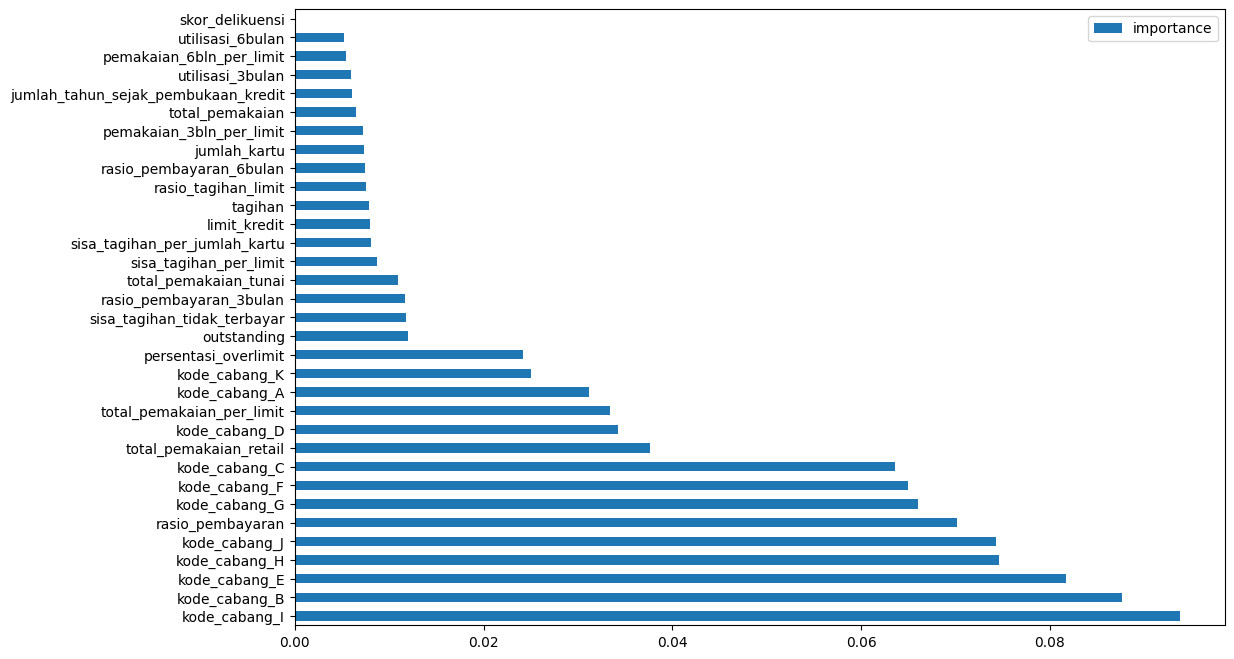

In [70]:
feature_importances.plot(kind='barh', figsize=(12, 8))

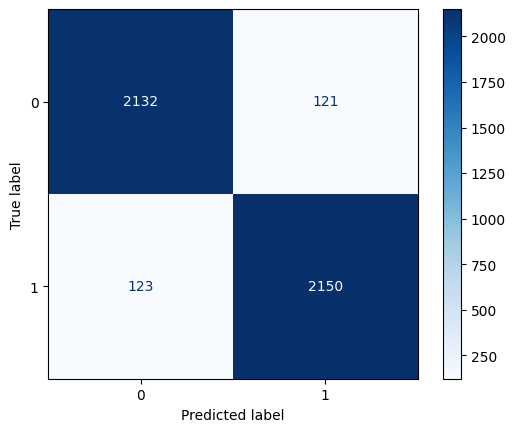

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(pred_xgb,y_cv)


# Menampilkan matriks kebingungan menggunakan ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Menyimpan Hasil Model (XGBoost)

In [72]:
# simpan nama kolom untuk keperluan prediksi nanti
with open("orders_class.pickle", 'wb') as fp:
    pickle.dump(x_train.columns, fp)

In [73]:
# simpan model
joblib.dump(xgb_model, "xgboost_flag_kredit_macet.joblib")

['xgboost_flag_kredit_macet.joblib']